<a href="https://colab.research.google.com/github/mahshadmoradi/Machine-Learning/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>

# Personal Data

In [ ]:
# Set your student number
student_number = 400109373
Name = 'Mahshad'
Last_Name = 'Moradi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch.

In [ ]:
%%capture
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

## Importing Libraries

In [ ]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict
import random

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [ ]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 10430842.09it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 210089.97it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3909762.60it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10589640.51it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

In [ ]:
# FILL HERE
input_dim = train_set[0][0].numel()
num_classes = len(train_set.classes)

print(f'Input Dimension: {input_dim}')
print(f'Number of Classes: {num_classes}')

Input Dimension: 784
Number of Classes: 10


In [ ]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

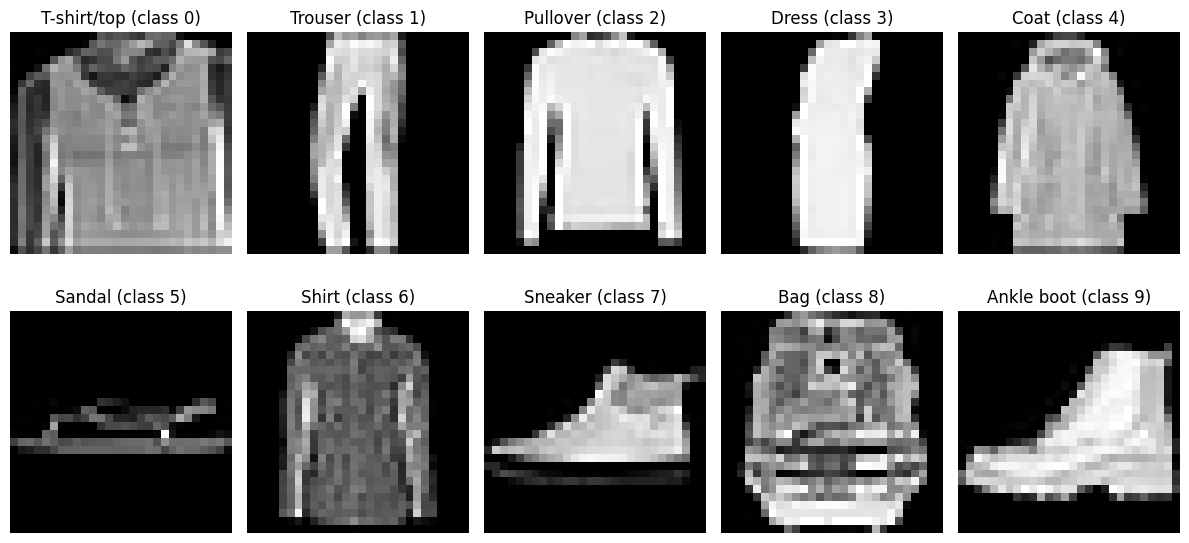

In [ ]:
# Convert the dataloader to a list and shuffle it
data_list = list(test_loader.dataset)
random.shuffle(data_list)

images_per_class = {} # Dictionary to store one image per class

# Iterate over the shuffled dataset to collect one image per class
for image, label in data_list:
    if label not in images_per_class:
        images_per_class[label] = image
    if len(images_per_class) == num_classes:
        break

# Sort the images by label
sorted_images = sorted(images_per_class.items())

# Plot the images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

class_names = test_loader.dataset.classes

for idx, (label, image) in enumerate(sorted_images):
    ax = axes[idx]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f'{class_names[label]} (class {label})')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [ ]:
def add_linear_layer(parameters: dict, shape, device, i=None):
    """
    This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        # kaiming initialization for ReLU activations:
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)  # no need to (1, n_out). it will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True
    # `i` is used to give numbers to parameter names
    parameters.update({f'w{i}': w, f'b{i}': b})

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [ ]:
# input_dim : input dimention of the first layer, which you have calculated before.
layers = [
    (input_dim, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, num_classes)
]
num_layers = len(layers)
parameters = {}

# setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# adding the parameters to the dictionary
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)

parameters.keys()

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [ ]:
def affine_forward(x, w, b):
    ## FILL HERE
    out = x @ w + b
    return out

def relu(x):
    ## FILL HERE
    return torch.maximum(x, torch.tensor(0.0))

Function `model` returns output of the whole model for the input `x` using the parameters:

In [ ]:
def model(x: torch.Tensor, parameters, num_layers=num_layers):
    # number of batches
    B = x.shape[0]
    x = x.view(B, -1)

    ## FILL HERE
    for i in range(num_layers):
        w = parameters[f'w{i}']
        b = parameters[f'b{i}']
        x = affine_forward(x, w, b)
        if i < num_layers - 1:
            x = relu(x)

    output = x

    return output

Implementing cross entropy loss:

In [ ]:
def cross_entropy_loss(scores, y):
    n = len(y)
    ## FILL HERE

    # Apply softmax to get the probabilities
    probs = torch.softmax(scores, dim=1)

    # Select the probabilities corresponding to the true labels
    log_probs = torch.log(probs[range(n), y])

    # Compute the loss
    loss = -torch.sum(log_probs) / n

    return loss

Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [ ]:
def sgd_optimizer(parameters: Dict[str, torch.Tensor], learning_rate=0.001):
    '''This function gets the parameters and a learning rate. Then updates the parameters using their
    gradient. Finally, you should zero the gradients of the parameters after updating
    the parameter value.'''
    ## FILL HERE

    for param in parameters.values():
        if param.grad is not None:
            # Update the parameter value using SGD
            param.data -= learning_rate * param.grad.data
            # Zero the gradients
            param.grad.zero_()

Training functions:

In [ ]:
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
    ## FILL HERE
    acc = np.mean(y_pred == y_true)
    return acc

def train(train_loader, parameters, learning_rate=0.001, epoch=None):
    '''This function implements the training loop for a single epoch. For each batch you should do the following:
        1- Calculate the output of the model to the given input batch
        2- Calculate the loss based on the model output
        3- Update the gradients using backward method
        4- Optimize the model parameters using the sgd_optimizer function defined previously
        5- Print the train loss (Show the epoch and batch as well)
        '''
    train_loss = 0
    N_train = len(train_loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []


    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        ## FILL HERE
        loss = cross_entropy_loss(p, y)
        train_loss += loss.item()

        # Backward pass
        loss.backward()

        # Optimize the model parameters
        sgd_optimizer(parameters, learning_rate=learning_rate)


        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)

    return train_loss, acc


def validate(loader, parameters, epoch=None, set_name=None):
    '''This function validates the model on the test dataloader. The function goes through each batch and does
    the following on each batch:
        1- Calculate the model output
        2- Calculate the loss using the model output
        3- Print the loss for each batch and epoch

    Finally the function calculates the model accuracy.'''
    total_loss = 0
    N = len(loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        ## FILL HERE
        loss = cross_entropy_loss(p, y)
        total_loss += loss.item()

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    total_loss /= N
    acc = accuracy(Y_pred, Y)

    return total_loss, acc

In [ ]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [ ]:
def train_model(dataloaders, num_epochs, learning_rate=0.001, model_name='pytorch_model'):
    '''This function trains the model for the number of epochs given and stores, calculates and prints the train
    and test losses and accuracies. Finally, it plots the accuracy and loss history for training and test sets'''
    train_loader, test_loader = dataloaders

    for epoch in range(num_epochs):
        ## FILL HERE
        ## You should calculate the train and test loss and accuracies for each epoch and add them to
        ## the lists `train_losses`, `test_losses`, `train_accuracies` and `test_accuracies`
        # Training phase
        train_loss, train_acc = train(train_loader, parameters, learning_rate, epoch)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validation phase
        test_loss, test_acc = validate(test_loader, parameters, epoch, set_name='Test')
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

    ## plot the loss history of training and test sets
    ## FILL HERE
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.legend()

    ## plot the accuracy history of training and test sets
    ## FILL HERE
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, num_epochs+1), test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy History')
    plt.legend()

    plt.show()

Epoch [1/25], Train Loss: 2147.6794, Test Loss: 0.2126, Train Accuracy: 0.2204, Test Accuracy: 0.3372
Epoch [2/25], Train Loss: 1937.8342, Test Loss: 0.1474, Train Accuracy: 0.3438, Test Accuracy: 0.4078
Epoch [3/25], Train Loss: 1142.7045, Test Loss: 0.0957, Train Accuracy: 0.5054, Test Accuracy: 0.5808
Epoch [4/25], Train Loss: 850.1723, Test Loss: 0.0825, Train Accuracy: 0.6545, Test Accuracy: 0.6630
Epoch [5/25], Train Loss: 738.4770, Test Loss: 0.0720, Train Accuracy: 0.7071, Test Accuracy: 0.7048
Epoch [6/25], Train Loss: 661.4522, Test Loss: 0.0625, Train Accuracy: 0.7430, Test Accuracy: 0.7657
Epoch [7/25], Train Loss: 607.0848, Test Loss: 0.0588, Train Accuracy: 0.7662, Test Accuracy: 0.7762
Epoch [8/25], Train Loss: 573.6572, Test Loss: 0.0555, Train Accuracy: 0.7798, Test Accuracy: 0.7857
Epoch [9/25], Train Loss: 549.5801, Test Loss: 0.0536, Train Accuracy: 0.7931, Test Accuracy: 0.7914
Epoch [10/25], Train Loss: 528.5021, Test Loss: 0.0524, Train Accuracy: 0.8027, Test Acc

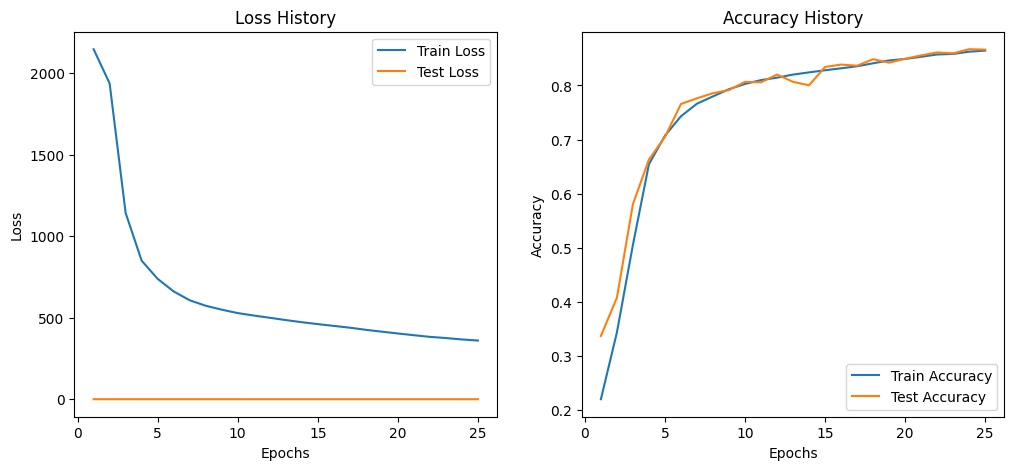

In [ ]:
train_model([train_loader, test_loader], num_epochs=25, learning_rate=0.005)

In [ ]:
print(f'Final test accuracy: {test_accuracies[-1]}')

Final test accuracy: 0.8661333333333333


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

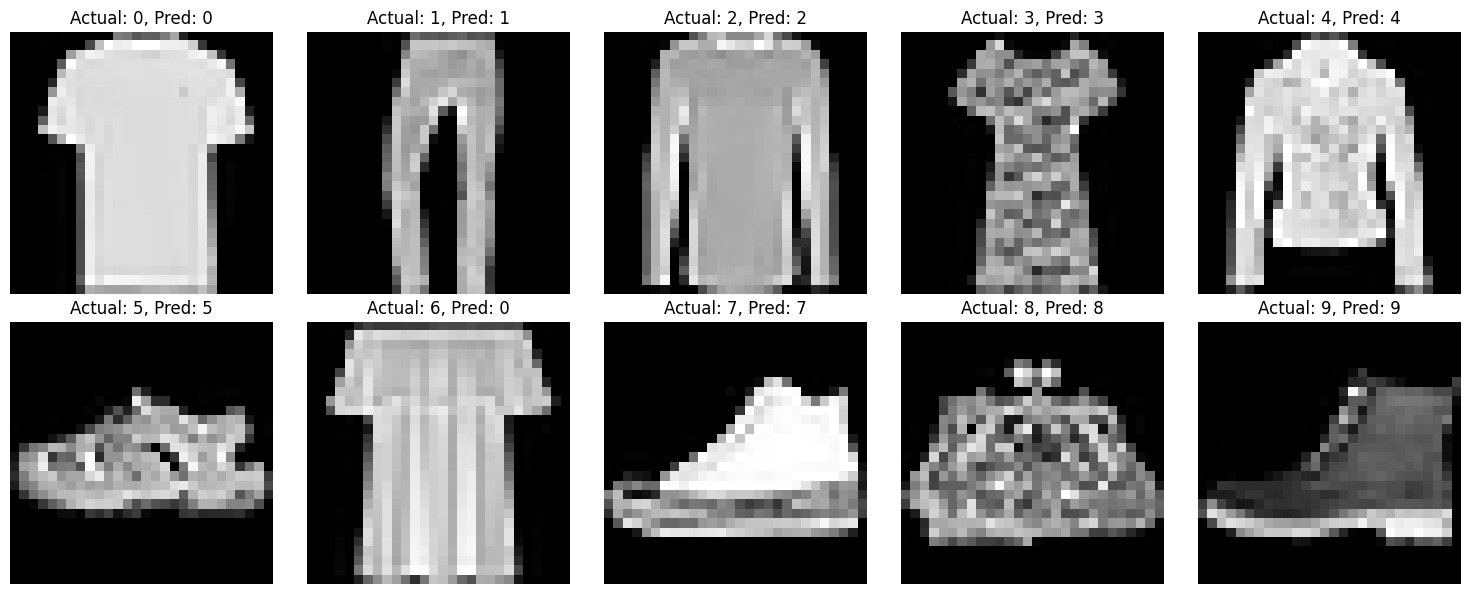

In [ ]:
## FILL HERE
def visualize_predictions(model, dataloader, parameters, num_classes=num_classes):
    class_images = {}

    with torch.no_grad():
        for x, y in dataloader:
            x = x.to(device)
            y = y.to(device)
            outputs = model(x, parameters)
            _, preds = torch.max(outputs, 1)

            for i in range(len(y)):
                label = y[i].item()
                if label not in class_images:
                    class_images[label] = (x[i].cpu(), preds[i].cpu().item())
                if len(class_images) == num_classes:
                    break
            if len(class_images) == num_classes:
                break

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    for label, (image, pred) in class_images.items():
        ax = axes[label]
        ax.imshow(image.squeeze(), cmap='gray')
        ax.set_title(f'Actual: {label}, Pred: {pred}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
visualize_predictions(model, test_loader, parameters)